#**California Housing Prices Regression**

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

The dataset is available on Google Colab

In [2]:
train_dataset = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_dataset = pd.read_csv('/content/sample_data/california_housing_test.csv')

**Data Exploration and Visualization**

In [3]:
print('Train dataset shape (rows, cols): ', train_dataset.shape)

train_dataset.sample(5)

Train dataset shape (rows, cols):  (17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15271,-122.28,37.89,52.0,1225.0,169.0,412.0,168.0,5.7912,327100.0
7507,-118.36,34.04,34.0,3239.0,806.0,2331.0,765.0,2.0538,125800.0
14238,-122.08,37.38,36.0,782.0,130.0,348.0,128.0,6.8280,383900.0
14954,-122.24,40.16,19.0,2500.0,509.0,1293.0,494.0,2.0350,55100.0
7244,-118.34,34.19,48.0,814.0,165.0,490.0,176.0,3.1406,223100.0


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
train_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [34]:
#!pip install seaborn==0.11.0

     |████████████████████████████████| 286kB 2.7MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


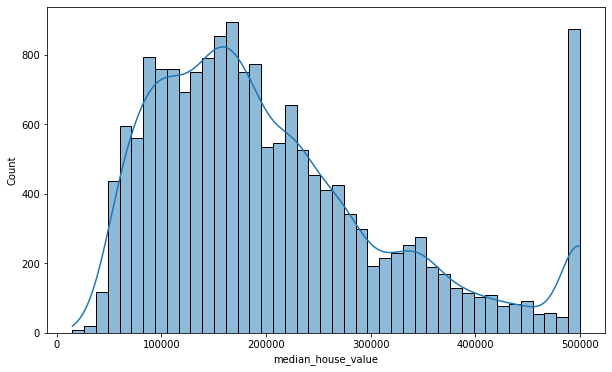

In [14]:
#Median house value histogram (Train dataset)

plt.figure(figsize=(10, 6))
sns.histplot(data=train_dataset['median_house_value'],
             kde=True)
plt.show()

In [ ]:
print('Test dataset shape (rows, cols): ', test_dataset.shape)

test_dataset.sample(5)

Test dataset shape (rows, cols):  (3000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
371,-118.38,34.18,32.0,3553.0,1060.0,3129.0,1010.0,2.5603,174200.0
1931,-120.93,39.90,20.0,1511.0,328.0,791.0,320.0,2.0221,70900.0
1510,-122.43,37.79,52.0,6186.0,1566.0,2065.0,1374.0,5.8543,500001.0
1760,-118.43,34.17,33.0,1679.0,404.0,933.0,412.0,2.6979,266000.0
1123,-121.96,37.55,4.0,3746.0,993.0,1606.0,838.0,4.1387,162500.0


In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [ ]:
test_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


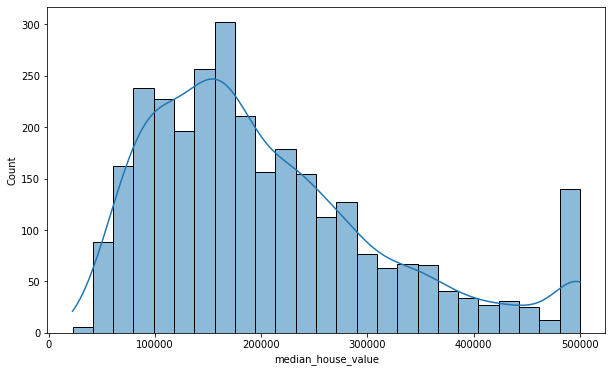

In [13]:
#Median house value histogram (Test dataset)

plt.figure(figsize=(10, 6))
sns.histplot(data=test_dataset['median_house_value'],
             kde=True)
plt.show()

**Splitting the dataset**

In [17]:
X_train = train_dataset.iloc[:, :-1].values
y_train = train_dataset.iloc[:, -1].values

X_test = test_dataset.iloc[:, :-1].values
y_test = test_dataset.iloc[:, -1].values

In [18]:
def report(y_test, y_pred):
  from sklearn.metrics import r2_score, mean_squared_error

  print('R^2:', r2_score(y_test, y_pred))
  print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

##**Training The Model Using RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 200,
                              random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

R^2: 0.811147679244841
RMSE: 49150.38965144701


##**Training The Model Using XGBRegressor**

In [19]:
from xgboost import XGBRegressor

model = XGBRegressor(objective ='reg:squarederror', 
                     n_estimators = 2500,
                     max_depth = 6,
                     colsample_bytree = 1,
                     eta=0.3, 
                     learning_rate = 0.1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)

R^2: 0.828059195338975
RMSE: 46898.10336689322
